# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "CF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'CF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_CF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.501  1  0.891 0.346 0.005   
                             age        0.022  1  0.040 0.843 0.000   
                             Kiel       1.876  1  3.337 0.069 0.017   
                             Magdeburg  5.226  1  9.300 0.003 0.046   
                             Sweden     9.044  1 16.093 0.000 0.078   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.016  1  1.061 0.304 0.006   
                             age        1.001  1  1.046 0.308 0.005   
                             Kiel       0.126  1  0.132 0.717 0.001   
                             Magdeburg  1.591  1  1.662 0.199 0.009   
                             Sweden    19.129  1 19.980 0.000 0.095   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.461  0.511    False  
                             age               0.074  0.906    False  
                             Kiel              1.159  0.157    False  
                             Magdeburg         2.582  0.011     True  
                             Sweden            4.063  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.517  0.468    False  
                             age               0.512  0.472    False  
                             Kiel              0.144  0.817    False  
                             Magdeburg         0.701  0.348    False  
                             Sweden            4.873  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      CF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.851  1  6.164 0.014 0.031   
                             age        0.000  1  0.003 0.954 0.000   
                             Kiel       0.229  1  1.661 0.199 0.009   
                             Magdeburg  0.561  1  4.062 0.045 0.021   
                             Sweden     1.857  1 13.452 0.000 0.066   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.901  1  5.874 0.016 0.030   
                             age        0.541  1  1.096 0.296 0.006   
                             Kiel       2.269  1  4.594 0.033 0.023   
                             Magdeburg  1.925  1  3.898 0.050 0.020   
                             Sweden    13.432  1 27.198 0.000 0.125   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.857  0.036     True  
                             age               0.020  0.972    False  
                             Kiel              0.701  0.314    False  
                             Magdeburg         1.344  0.096    False  
                             Sweden            3.499  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.788  0.041     True  
                             age               0.528  0.427    False  
                             Kiel              1.477  0.075    False  
                             Magdeburg         1.303  0.104    False  
                             Sweden            6.323  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     CF                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.014         1.857  0.036     True   
                             Kiel      0.199         0.701  0.314    False   
                             Magdeburg 0.045         1.344  0.096    False   
                             Sweden    0.000         3.499  0.001     True   
                             age       0.954         0.020  0.972    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.016         1.788  0.041     True   
                             Kiel      0.033         1.477  0.075    False   
                             Magdeburg 0.050         1.303  0.104    False   
                             Sweden    0.000         6.323  0.000     True   
                             age       0.296         0.528  0.427    False   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.346         0.461  0.511    False  
                             Kiel      0.069         1.159  0.157    False  
                             Magdeburg 0.003         2.582  0.011     True  
                             Sweden    0.000         4.063  0.001     True  
                             age       0.843         0.074  0.906    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.304         0.517  0.468    False  
                             Kiel      0.717         0.144  0.817    False  
                             Magdeburg 0.199         0.701  0.348    False  
                             Sweden    0.000         4.873  0.000     True  
                             age       0.308         0.512  0.472    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'CF': 'CF', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.226         3.276     0.280     0.260         2.479     0.336
std       0.294         6.239     0.321     0.302         5.301     0.329
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.001         0.404     0.002     0.004         0.335     0.015
50%       0.062         1.211     0.123     0.121         0.916     0.243
75%       0.394         3.296     0.526     0.462         2.430     0.616
max       0.999        86.244     0.999     0.999       146.424     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_49508/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        CF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.014         1.857   
A0A024R0T9;K7ER74;P02655                           AD     0.034         1.464   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.316         0.500   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.247         0.607   
A0A075B6H7                                         AD     0.001         2.873   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.335         0.475   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.476         0.322   
S4R3U6                                             AD     0.016         1.788   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.036     True   
A0A024R0T9;K7ER74;P02655                           AD      0.076    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.449    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.371    False   
A0A075B6H7                                         AD      0.005     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.284    False   
Q9Y6X5                                             AD      0.467    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.157    False   
Q9Y6Y9                                             AD      0.602    False   
S4R3U6                                             AD      0.041     True   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.346         0.461   
A0A024R0T9;K7ER74;P02655                           AD     0.053         1.278   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.062         1.210   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.408         0.389   
A0A075B6H7                                         AD     0.177         0.752   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.064         1.194   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.264         0.578   
S4R3U6                                             AD     0.304         0.517   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.511    False  
A0A024R0T9;K7ER74;P02655                           AD      0.127    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.143    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.568    False  
A0A075B6H7                                         AD      0.320    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.232         1.638     0.292     0.251         1.399     0.334
std       0.289         1.932     0.313     0.288         1.595     0.314
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.007         0.406     0.020     0.013         0.362     0.040
50%       0.079         1.100     0.151     0.125         0.903     0.248
75%       0.393         2.154     0.524     0.435         1.901     0.593
max       0.997        25.413     0.998     0.999        19.462     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,CF,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,935,1032


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

CF                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.014         1.857  0.036   
A0A024R0T9;K7ER74;P02655                           0.034         1.464  0.076   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.316         0.500  0.449   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.247         0.607  0.371   
A0A075B6H7                                         0.001         2.873  0.005   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.284   
Q9Y6X5                                             0.335         0.475  0.467   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.157   
Q9Y6Y9                                             0.476         0.322  0.602   
S4R3U6                                             0.016         1.788  0.041   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.346   
A0A024R0T9;K7ER74;P02655                              False 0.053   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.062   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.408   
A0A075B6H7                                             True 0.177   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.064   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.264   
S4R3U6                                                 True 0.304   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.461  0.511   
A0A024R0T9;K7ER74;P02655                                   1.278  0.127   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.210  0.143   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.389  0.568   
A0A075B6H7                                                 0.752  0.320   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.317   
Q9Y6X5                                                     1.194  0.148   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.182   
Q9Y6Y9                                                     0.578  0.425   
S4R3U6                                                     0.517  0.468   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
CF (no)  - PI (no)    886
CF (yes) - PI (yes)   340
CF (yes) - PI (no)    146
CF (no)  - PI (yes)    49
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_49508/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


CF                       \
                                                 p-unc -Log10 pvalue qvalue   
protein groups                                                                
A0A024QZX5;A0A087X1N8;P35237                     0.014         1.857  0.036   
A0A075B6H7                                       0.001         2.873  0.005   
A0A075B6R2                                       0.001         2.922  0.004   
A0A075B7B8                                       0.000         5.922  0.000   
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2 0.000         5.031  0.000   
...                                                ...           ...    ...   
Q9UNW1                                           0.728         0.138  0.812   
Q9UP79                                           0.001         3.070  0.003   
Q9UQ52                                           0.001         3.205  0.002   
Q9Y281;Q9Y281-3                                  0.002         2.772  0.006   
S4R3U6                                           0.016         1.788  0.041   

                                                             PI                \
                                                 rejected p-unc -Log10 pvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                         True 0.346         0.461   
A0A075B6H7                                           True 0.177         0.752   
A0A075B6R2                                           True 0.311         0.508   
A0A075B7B8                                           True 0.359         0.445   
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2     True 0.956         0.019   
...                                                   ...   ...           ...   
Q9UNW1                                              False 0.016         1.800   
Q9UP79                                               True 0.180         0.744   
Q9UQ52                                               True 0.019         1.713   
Q9Y281;Q9Y281-3                                      True 0.606         0.218   
S4R3U6                                               True 0.304         0.517   

                                                                      data  
                                                 qvalue rejected frequency  
protein groups                                                              
A0A024QZX5;A0A087X1N8;P35237                      0.511    False       186  
A0A075B6H7                                        0.320    False        91  
A0A075B6R2                                        0.476    False       164  
A0A075B7B8                                        0.522    False        57  
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2  0.975    False       134  
...                                                 ...      ...       ...  
Q9UNW1                                            0.049     True       171  
Q9UP79                                            0.324    False       135  
Q9UQ52                                            0.057    False       188  
Q9Y281;Q9Y281-3                                   0.733    False        51  
S4R3U6                                            0.468    False       126  

[195 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,CF,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.036,0.511,186,CF (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.076,0.127,195,CF (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.449,0.143,174,CF (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.371,0.568,196,CF (no) - PI (no)
A0A075B6H7,0.005,0.320,91,CF (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.284,0.317,197,CF (no) - PI (no)
Q9Y6X5,0.467,0.148,173,CF (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.157,0.182,197,CF (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,CF,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2,0.000,0.975,134,CF (yes) - PI (no),0.974
P01743,0.020,0.983,113,CF (yes) - PI (no),0.963
P22748,0.022,0.977,159,CF (yes) - PI (no),0.955
O15204;O15204-2,0.011,0.957,156,CF (yes) - PI (no),0.946
O00187;O00187-2,0.005,0.876,119,CF (yes) - PI (no),0.872
...,...,...,...,...,...
A0A0J9YXX1,0.047,0.057,197,CF (yes) - PI (no),0.010
F5GY80;F5H7G1;P07358,0.047,0.057,197,CF (yes) - PI (no),0.010
Q9NX62,0.046,0.055,197,CF (yes) - PI (no),0.009


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_1_CF


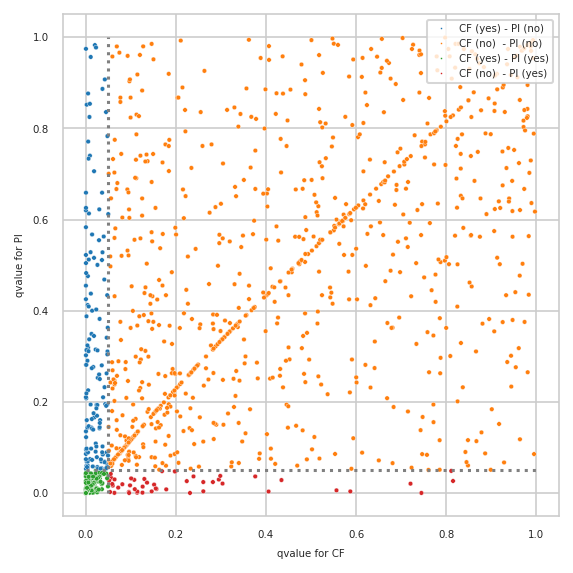

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_2_CF


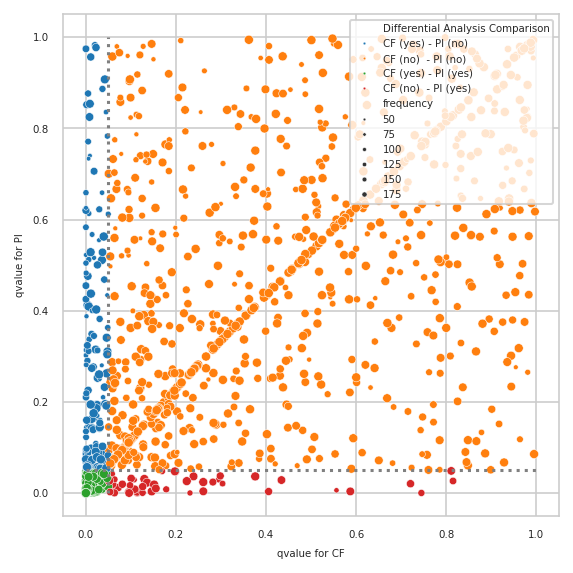

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN1,ENSP00000326366,5.000
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
FRAT2,ENSP00000360058,0.681
CLEC4M,ENSP00000316228,0.681
DSC2,ENSP00000280904,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/3fa5fb1d5dd2a817778dc1597a6471cf_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out